PRE-LECTURE HOMEWORK 

pre-lecture homework question 1: 

In [1]:
import plotly.express as px
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


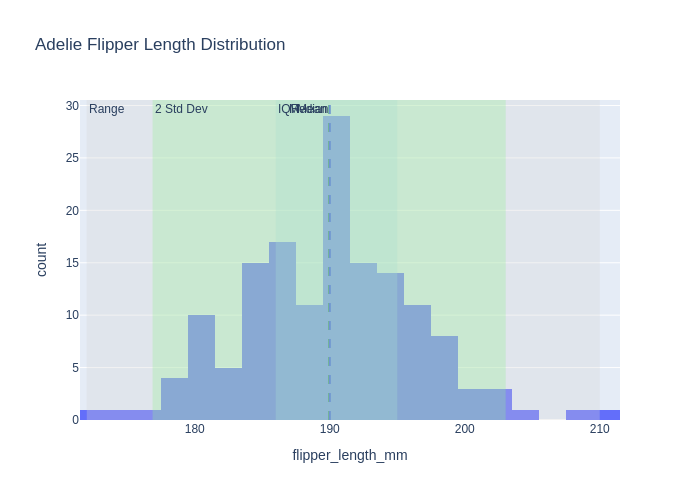

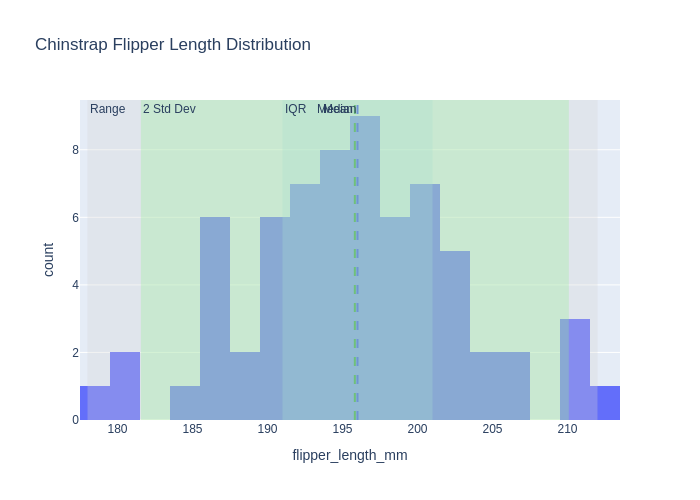

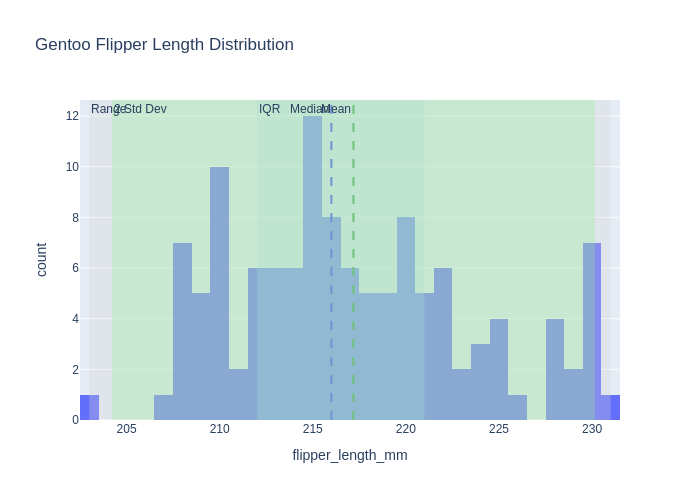

In [2]:
import plotly.express as px
import pandas as pd

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Clean the dataset by removing rows with missing 'flipper_length_mm'
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Function to compute statistics (mean, median, range, IQR, and 2 std dev range)
def get_statistics(df, column):
    stats = {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'min': df[column].min(),
        'max': df[column].max(),
        'q1': df[column].quantile(0.25),
        'q3': df[column].quantile(0.75),
        'std': df[column].std()
    }
    stats['lower_bound'] = stats['mean'] - 2 * stats['std']
    stats['upper_bound'] = stats['mean'] + 2 * stats['std']
    return stats

# Create a list to store figures for each species
figures = []

# Iterate over each species and create the plots
for species in penguins_clean['species'].unique():
    species_df = penguins_clean[penguins_clean['species'] == species]
    stats = get_statistics(species_df, 'flipper_length_mm')
    
    # Create histogram for the current species
    fig = px.histogram(species_df, x='flipper_length_mm', nbins=30, title=f'{species} Flipper Length Distribution')
    
    # Add vertical lines for mean and median
    fig.add_vline(x=stats['mean'], line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=stats['median'], line_dash="dash", line_color="blue", annotation_text="Median", annotation_position="top left")
    
    # Add vertical rectangles for range, IQR, and 2 std deviation range
    fig.add_vrect(x0=stats['min'], x1=stats['max'], fillcolor="lightgrey", opacity=0.3, line_width=0, annotation_text="Range", annotation_position="top left")
    fig.add_vrect(x0=stats['q1'], x1=stats['q3'], fillcolor="lightblue", opacity=0.3, line_width=0, annotation_text="IQR", annotation_position="top left")
    fig.add_vrect(x0=stats['lower_bound'], x1=stats['upper_bound'], fillcolor="lightgreen", opacity=0.3, line_width=0, annotation_text="2 Std Dev", annotation_position="top left")
    
    # Append figure to the list
    figures.append(fig)

# Display all figures for each species
for fig in figures:
    fig.show(renderer='png')

pre-lecture homework question 2: 

In [3]:
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

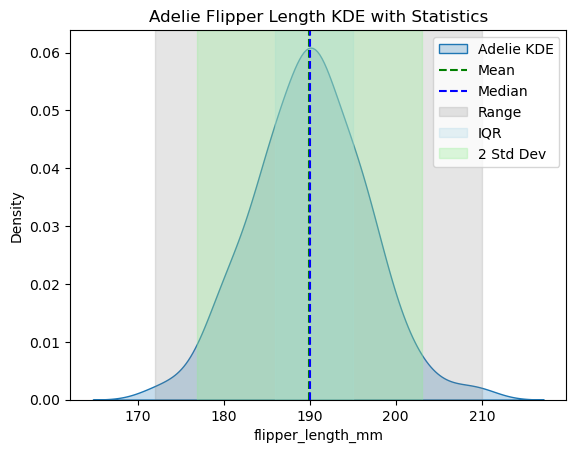

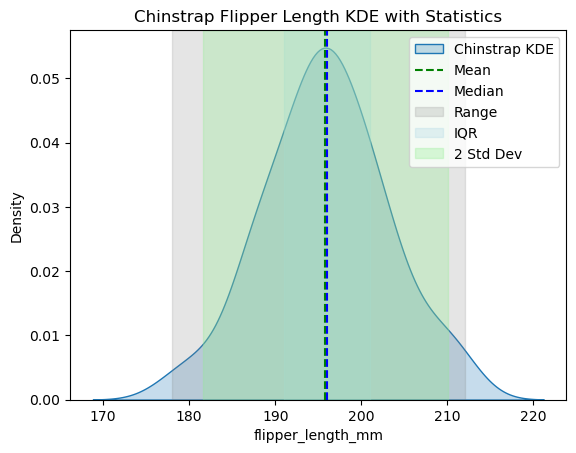

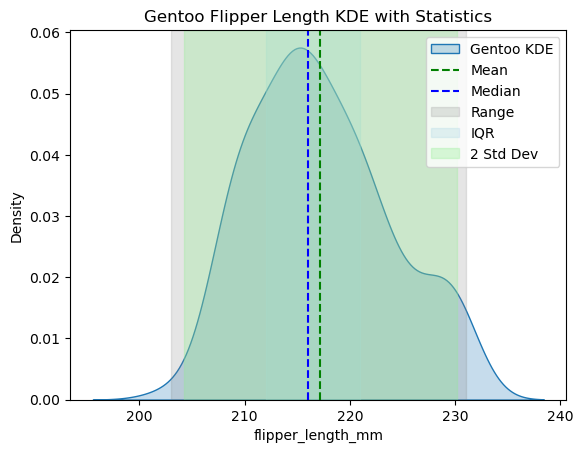

In [5]:
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Clean the dataset by removing rows with missing 'flipper_length_mm'
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Function to compute statistics (mean, median, range, IQR, and 2 std dev range)
def get_statistics(df, column):
    stats = {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'min': df[column].min(),
        'max': df[column].max(),
        'q1': df[column].quantile(0.25),
        'q3': df[column].quantile(0.75),
        'std': df[column].std()
    }
    stats['lower_bound'] = stats['mean'] - 2 * stats['std']
    stats['upper_bound'] = stats['mean'] + 2 * stats['std']
    return stats

# Iterate over each species
for species in penguins_clean['species'].unique():
    species_df = penguins_clean[penguins_clean['species'] == species]
    stats = get_statistics(species_df, 'flipper_length_mm')
    
    # Create a Seaborn KDE plot
    sns.kdeplot(data=species_df, x='flipper_length_mm', fill=True, label=f'{species} KDE')
    
    # Add vertical lines for mean and median
    plt.axvline(stats['mean'], color='green', linestyle='--', label='Mean')
    plt.axvline(stats['median'], color='blue', linestyle='--', label='Median')
    
    # Add shaded areas for range, IQR, and 2 std deviations
    plt.axvspan(stats['min'], stats['max'], color='grey', alpha=0.2, label='Range')
    plt.axvspan(stats['q1'], stats['q3'], color='lightblue', alpha=0.3, label='IQR')
    plt.axvspan(stats['lower_bound'], stats['upper_bound'], color='lightgreen', alpha=0.3, label='2 Std Dev')
    
    # Add legend and show plot
    plt.legend()
    plt.title(f'{species} Flipper Length KDE with Statistics')
    plt.show()
   

pre-lecture homework question 3: 
done in chatbot; observations and all communications written out in chatbot

pre-lecture homework question 4: 

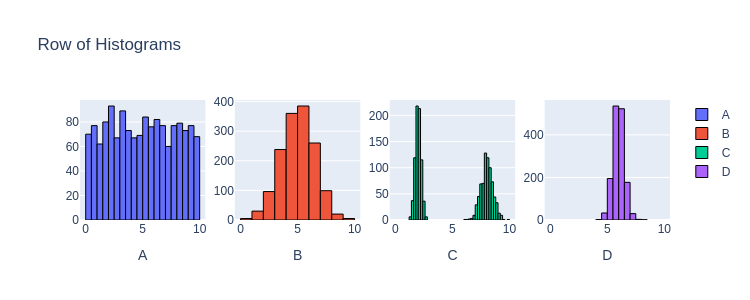

In [6]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

fig.show(renderer="png")
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

4i) Data set A and B have similar means and variances 

4ii) Data set A and Data set C have similar means to Data set B but have difference variances than Data set A and C 

4iii)Data set D and B have similar deviations but different means. 

4iiii) Data set C and Data set D have different means and variances 

answers checked in ChatBot 

post-lecture homework question 6: 

In [7]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-13/historical_spending.csv'
df = pd.read_csv(url)
df.isna().sum()

Year                  0
PercentCelebrating    0
PerPerson             0
Candy                 0
Flowers               0
Jewelry               0
GreetingCards         0
EveningOut            0
Clothing              0
GiftCards             0
dtype: int64

In [8]:
print (df)

    Year  PercentCelebrating  PerPerson  Candy  Flowers  Jewelry  \
0   2010                  60     103.00   8.60    12.33    21.52   
1   2011                  58     116.21  10.75    12.62    26.18   
2   2012                  59     126.03  10.85    13.49    29.60   
3   2013                  60     130.97  11.64    13.48    30.94   
4   2014                  54     133.91  10.80    15.00    30.58   
5   2015                  55     142.31  12.70    15.72    36.30   
6   2016                  55     146.84  13.11    14.78    33.11   
7   2017                  54     136.57  12.68    14.63    32.32   
8   2018                  55     143.56  13.12    14.75    34.10   
9   2019                  51     161.96  14.12    15.07    30.34   
10  2020                  55     196.31  17.30    16.49    41.65   
11  2021                  52     164.76  15.32    15.42    30.71   
12  2022                  53     175.41  15.90    16.71    45.75   

    GreetingCards  EveningOut  Clothing  GiftCa

In [9]:
summary = df.describe() 
print(summary)

             Year  PercentCelebrating   PerPerson      Candy    Flowers  \
count    13.00000           13.000000   13.000000  13.000000  13.000000   
mean   2016.00000           55.461538  144.449231  12.837692  14.653077   
std       3.89444            2.933013   25.146163   2.400483   1.351261   
min    2010.00000           51.000000  103.000000   8.600000  12.330000   
25%    2013.00000           54.000000  130.970000  10.850000  13.490000   
50%    2016.00000           55.000000  142.310000  12.700000  14.780000   
75%    2019.00000           58.000000  161.960000  14.120000  15.420000   
max    2022.00000           60.000000  196.310000  17.300000  16.710000   

         Jewelry  GreetingCards  EveningOut   Clothing  GiftCards  
count  13.000000      13.000000   13.000000  13.000000  13.000000  
mean   32.546154       7.676154   27.467692  14.935385  11.503077  
std     6.188459       0.869286    3.217966   3.701526   2.720188  
min    21.520000       5.910000   21.390000  10.4200

In [10]:
missing_values = df.select_dtypes(include='number').isnull().sum()

In [11]:
print(missing_values)

Year                  0
PercentCelebrating    0
PerPerson             0
Candy                 0
Flowers               0
Jewelry               0
GreetingCards         0
EveningOut            0
Clothing              0
GiftCards             0
dtype: int64


In [12]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [13]:
import pandas as pd
import plotly.express as px
fig = px.box(df, y = 'Flowers', )

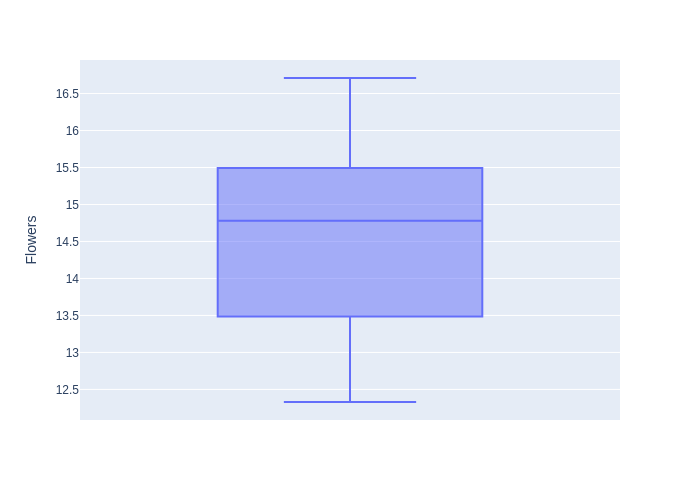

In [14]:
fig.show(renderer='png')

In [15]:
df = df.dropna(subset=['PercentCelebrating'])

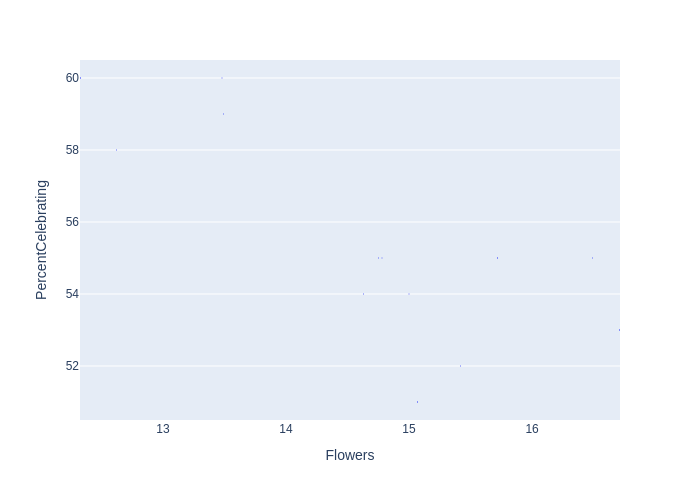

In [18]:
fig = px.box(df, x="Flowers", y="PercentCelebrating")
fig.show(renderer='png') 

In [17]:
print(df['PercentCelebrating'].isna().sum())

0


ChatBot Summary 1: 
    Certainly! Here’s a summary of our conversation:

Initial Request:

You wanted to use fig.add_vline() and fig.add_vrect() from Plotly to mark statistical metrics (mean, median, range, IQR, and two standard deviations) on KDE plots of flipper_length_mm for each species in the penguins dataset.
Dataset and Approach:

You provided the penguins dataset for this task.
I explained how you could calculate the necessary statistics (mean, median, IQR, etc.) for each species and plot KDE using Seaborn.
We discussed how to overlay lines (mean, median) and rectangles (range, IQR, 2 standard deviations) using Plotly on top of the Seaborn KDE plot.
Clarifications:

I clarified the differences between Plotly histograms and Seaborn KDE plots.
I explained that we were initially combining Seaborn for KDE plots and Plotly for adding the vertical lines and rectangles.
I also mentioned that if you wanted to work only with Seaborn/Matplotlib, we could directly add lines and rectangles using Matplotlib's functions without needing Plotly.
Next Steps:

I outlined the steps for creating KDE plots, computing statistics, and overlaying lines and rectangles using Plotly.

Chatbot Link1: https://chatgpt.com/share/66f5bc81-e1f8-800f-991a-06664c0eee28 

Chatbot Summary 2: 

        1. Code Error (Pandas Read CSV):
You encountered an AttributeError when trying to use pd.read.csv(). I explained that the correct function is pd.read_csv().

2. Box Plot Issue:
You had an issue where your box plot appeared blank when trying to add a y value.
I suggested checking if:
The column name was correct.
The column had the proper data type (numeric) for the y-axis.
There were missing values or invalid entries (like strings).
I provided troubleshooting tips, including checking the column type, inspecting unique values, and ensuring enough variation in the data.

3. Missing Values (isna().sum()):
You ran df.isna().sum() for the column PercentCelebrating and got a result of 0, indicating no missing values.
I suggested checking for other possible data issues, such as non-numeric values or insufficient data variation.

4. Handling Issues with Blank Plots:
I suggested trying a simple box plot with just a y axis, verifying data variation using df.describe(), and ensuring proper rendering in Plotly by setting the correct renderer.
You’re now troubleshooting potential issues with your box plot visualization based on data types and ensuring enough variation in the dataset for the plot to render properly.

ChatBot Link2: https://chatgpt.com/share/66f5bd0f-3fd4-800f-b61f-042f770fdf84




